In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [28]:
dataset = pd.read_csv('Admission_Predict.csv', encoding='ISO-8859-1')
dataset


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [29]:
dataset.dtypes
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [30]:
dataset.isnull().sum()
dataset = dataset.dropna()

dataset = dataset.drop(['Serial No.'], axis=1)

In [31]:
dataset = dataset.rename(columns={'Chance of Admit ': 'Chance of Admit'})
dataset = dataset.rename(columns={'LOR ': 'LOR'})
dataset = dataset.rename(columns={'GRE Score': 'GRE_Score'})
dataset = dataset.rename(columns={'TOEFL Score': 'TOEFL_Score'})
dataset = dataset.rename(columns={'University Rating': 'University_Rating'})
dataset = dataset.rename(columns={'Chance of Admit': 'Chance_of_Admit'})
dataset = dataset.rename(columns={'SOP': 'SOP'})
dataset = dataset.rename(columns={'LOR': 'LOR'})
dataset = dataset.rename(columns={'CGPA': 'CGPA'})
dataset = dataset.rename(columns={'Research': 'Research'})


In [32]:
dataset['GRE_Score'] = dataset['GRE_Score'].astype(int)
dataset['TOEFL_Score'] = dataset['TOEFL_Score'].astype(int)
dataset['University_Rating'] = dataset['University_Rating'].astype(int)
dataset['SOP'] = dataset['SOP'].astype(float)
dataset['LOR'] = dataset['LOR'].astype(float)
dataset['CGPA'] = dataset['CGPA'].astype(float)
dataset['Research'] = dataset['Research'].astype(int)


In [33]:
dataset

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [34]:
for col in dataset.columns:
    print(col, ':', len(dataset[col].unique()), 'labels')   

GRE_Score : 49 labels
TOEFL_Score : 29 labels
University_Rating : 5 labels
SOP : 9 labels
LOR : 9 labels
CGPA : 168 labels
Research : 2 labels
Chance_of_Admit : 60 labels


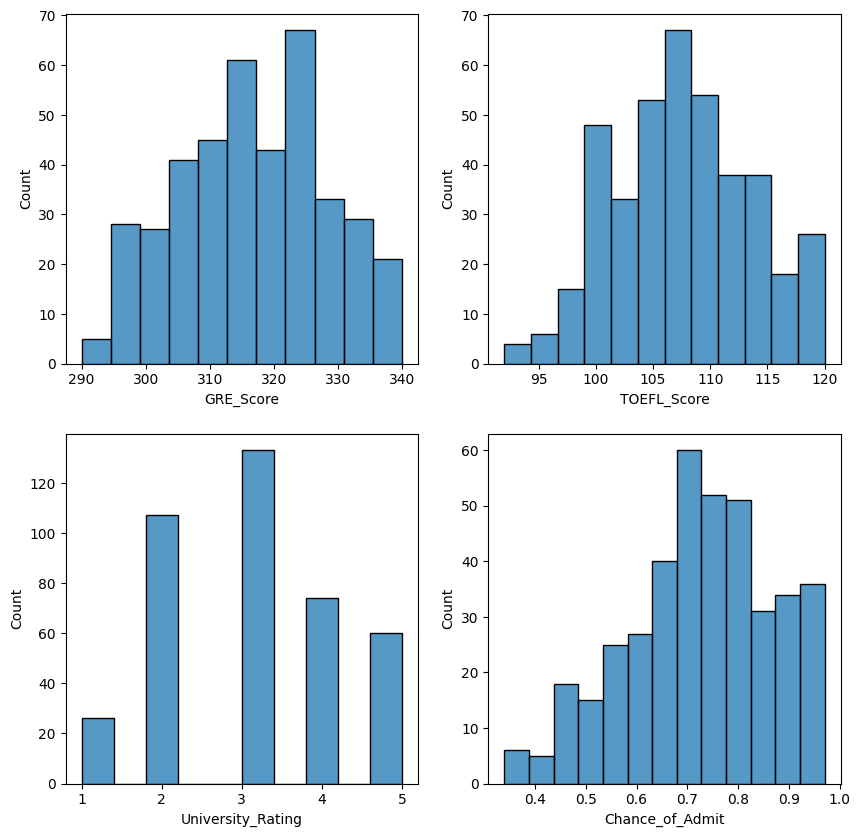

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax, ax2, ax3, ax4 = axes.flatten()

sns.histplot(dataset['GRE_Score'], ax=ax)
sns.histplot(dataset['TOEFL_Score'], ax=ax2)
sns.histplot(dataset['University_Rating'], ax=ax3)
sns.histplot(dataset['Chance_of_Admit'], ax=ax4)


plt.show()


In [36]:
best_groub_University_Rating = dataset.groupby('University_Rating').agg({'Chance_of_Admit': 'mean'}).sort_values('Chance_of_Admit', ascending=False)

C:\Users\lucas\AppData\Local\Temp\ipykernel_35112\1025298353.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='University_Rating', data=dataset, palette='hsv')


<Axes: xlabel='University_Rating', ylabel='count'>

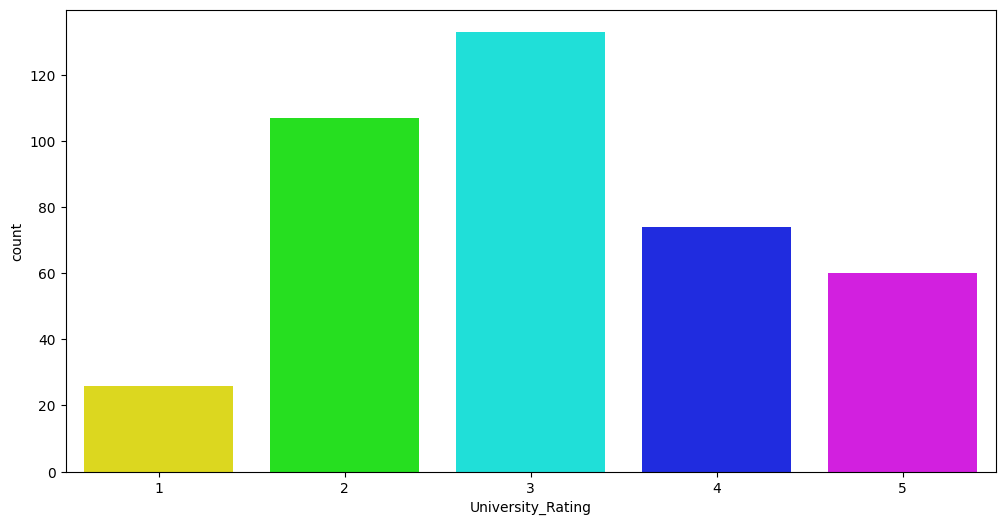

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(x='University_Rating', data=dataset, palette='hsv')

<Axes: xlabel='GRE_Score'>

<Figure size 1200x600 with 0 Axes>

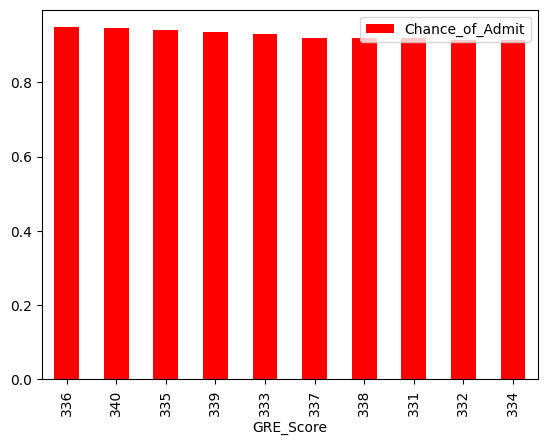

In [38]:
best_ordered_GRE_Score = dataset.groupby('GRE_Score').agg({'Chance_of_Admit': 'mean'}).sort_values('Chance_of_Admit', ascending=False)[:10]

plt.figure(figsize=(12, 6))
best_ordered_GRE_Score.plot(kind='bar', color='r')


[0.19517028 0.17180405 0.10429148 0.06272874 0.04508372 0.38094414
 0.03997758]


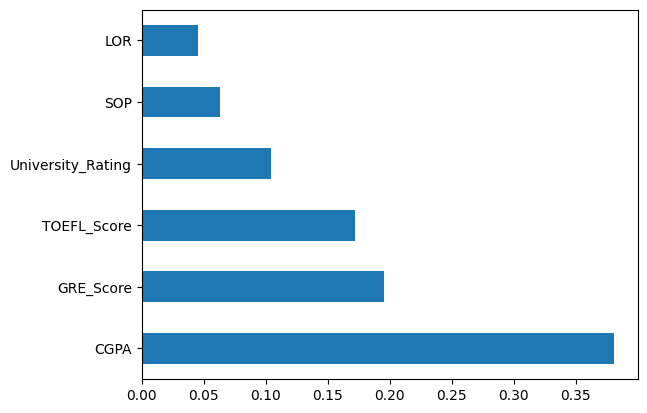

In [40]:
# StandardScaler:
scaler = StandardScaler()

dataset = scaler.fit_transform(dataset)
dataset = pd.DataFrame(dataset, columns=['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance_of_Admit'])
X = dataset.drop('Chance_of_Admit', axis=1)
y = dataset['Chance_of_Admit']


# choose the bests features by using the feature importance:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, dataset['Chance_of_Admit'])
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

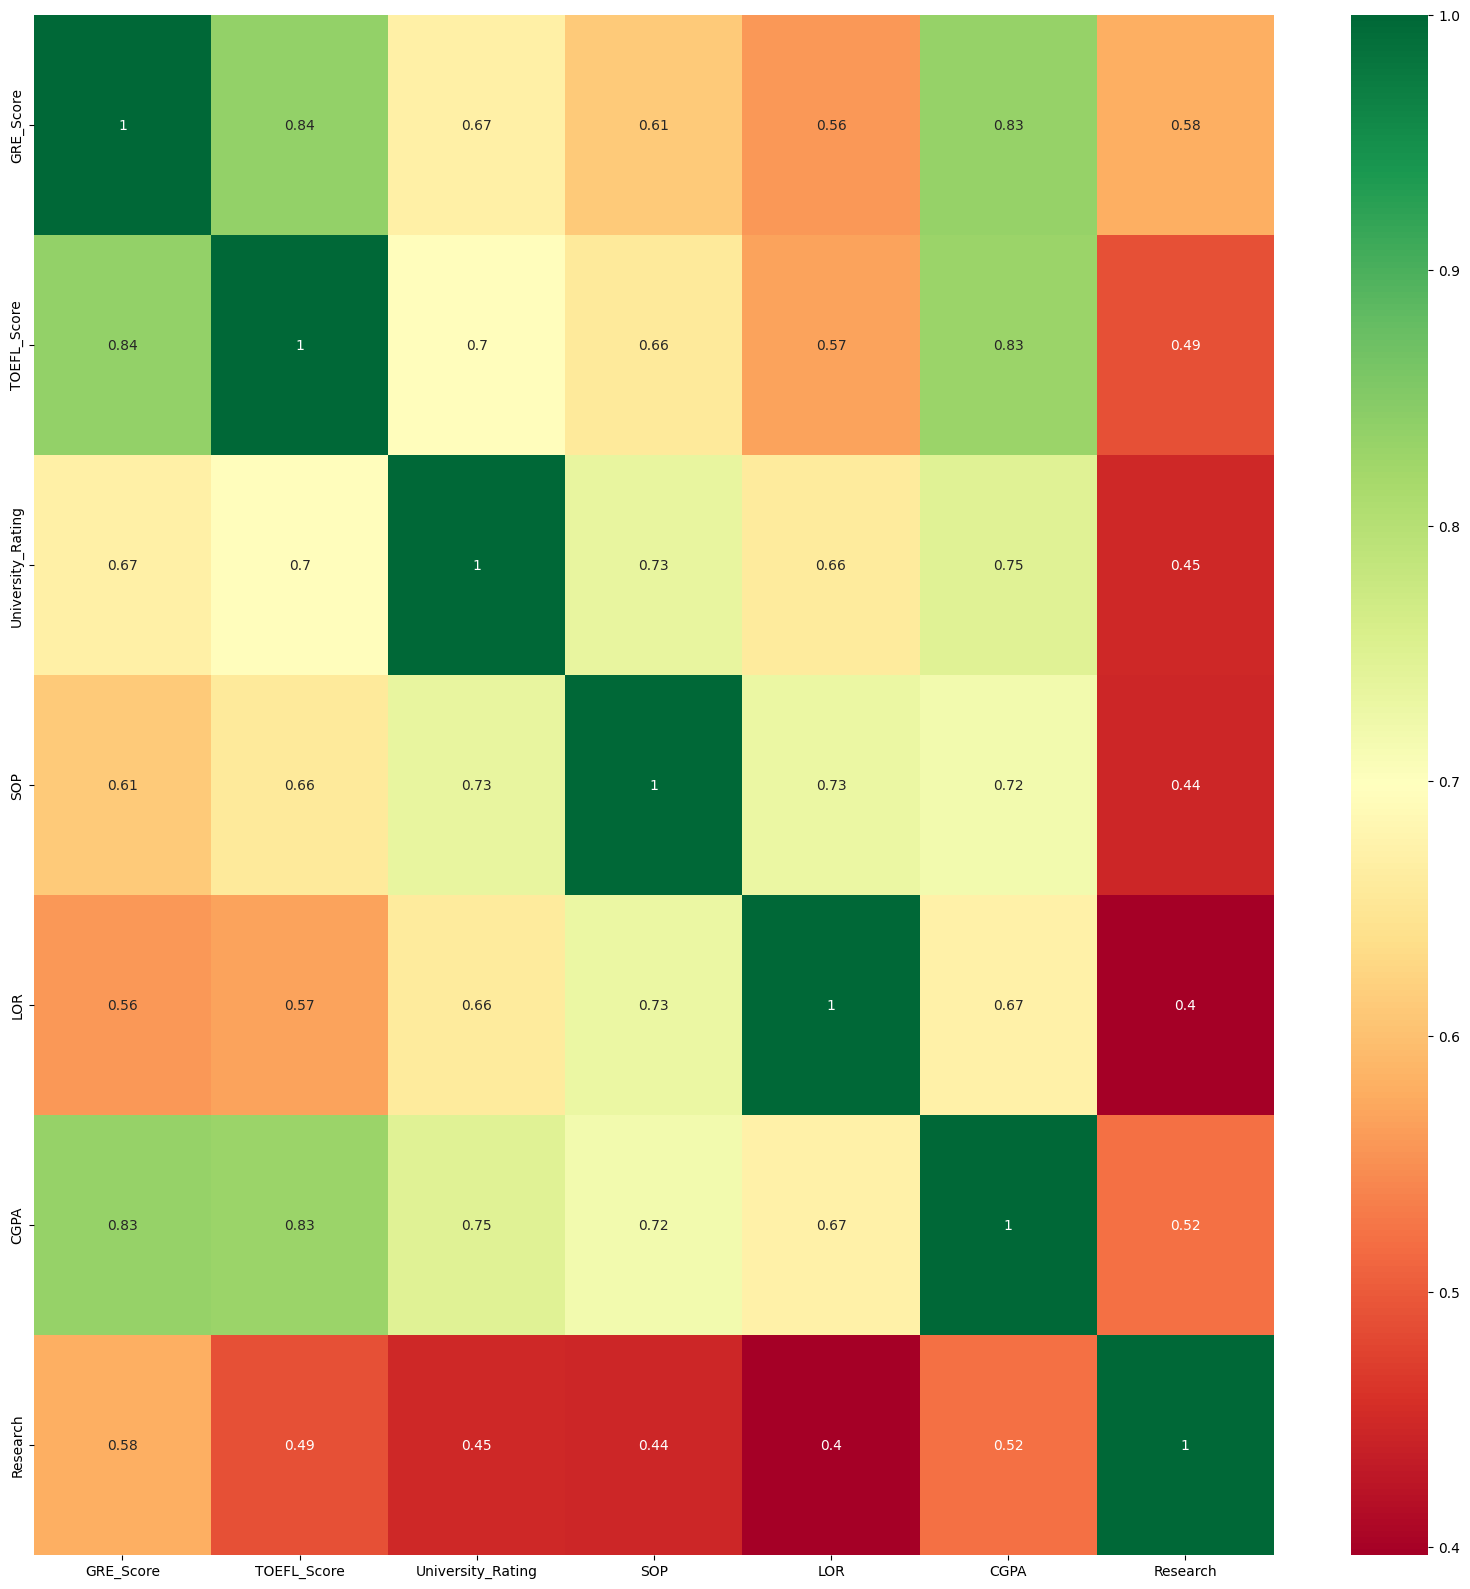

In [41]:
# correlation matrix:
corrmat = dataset.drop('Chance_of_Admit', axis=1).corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20, 20))

g = sns.heatmap(dataset[top_corr_features].corr(), annot=True, cmap='RdYlGn')


In [42]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)


In [43]:
resulted_model = pd.DataFrame(columns=['Model', 'R2 Score', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])

In [44]:

from matplotlib.pyplot import grid
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

model_random_forest = RandomForestRegressor()
grid_random_forest = {
    'n_estimators': [10, 100, 1000],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 100, 1000],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['poisson', 'squared_error', 'absolute_error', 'friedman_mse']
    
}
grid_search_random_forest = RandomizedSearchCV(model_random_forest, grid_random_forest, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search_random_forest.fit(X_train, y_train)
model_random_forest = grid_search_random_forest.best_estimator_
model_random_forest.fit(X_train, y_train)
y_pred = model_random_forest.predict(X_test)
print('Random Forest Regressor:')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
model_random_forest = pd.DataFrame([['Random Forest Regressor', r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]], columns=['Model', 'R2 Score', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])

resulted_model = pd.concat([resulted_model,model_random_forest], ignore_index=True)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\lucas\Desktop\COURSES\SCIENCE_PROJECTS\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lucas\Desktop\COURSES\SCIENCE_PROJECTS\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lucas\Desktop\COURSES\SCIENCE_PROJECTS\.venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucas\Desktop\COU

Random Forest Regressor:
Mean Squared Error: 0.2501865677824379
Mean Absolute Error: 0.3429243695193924
R2 Score: 0.7206311511261487


C:\Users\lucas\AppData\Local\Temp\ipykernel_35112\3575092826.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resulted_model = pd.concat([resulted_model,model_random_forest], ignore_index=True)


In [45]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train, y_train)
y_pred = model_linear_regression.predict(X_test)
print('Linear Regression:')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
model_linear_regression = pd.DataFrame([['Linear Regression', r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]], columns=['Model', 'R2 Score', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])

resulted_model = pd.concat([resulted_model,model_linear_regression], ignore_index=True)


Linear Regression:
Mean Squared Error: 0.23686383618849502
Mean Absolute Error: 0.35166195262533123
R2 Score: 0.7355078738145215


In [46]:
model_ridge = Ridge()
grid_ridge = {
    'alpha': [0.1, 0.01, 0.001, 0.0001, 0]
}
grid_search_ridge = RandomizedSearchCV(model_ridge, grid_ridge, n_iter=5, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search_ridge.fit(X_train, y_train)
model_ridge = grid_search_ridge.best_estimator_
model_ridge.fit(X_train, y_train)
y_pred = model_ridge.predict(X_test)
print('Ridge:')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
model_ridge = pd.DataFrame([['Ridge', r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]], columns=['Model', 'R2 Score', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])

resulted_model = pd.concat([resulted_model,model_ridge], ignore_index=True)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Ridge:
Mean Squared Error: 0.2368241413072746
Mean Absolute Error: 0.3516214242443511
R2 Score: 0.7355521987891636


In [47]:

model_lasso = Lasso()
grid_lasso = {
    'alpha': [0.1, 0.01, 0.001, 0.0001, 0],
    'selection': ['cyclic', 'random'],
    'max_iter': [1000, 10000, 100000],
    'warm_start': [True, False],
    'positive': [True, False],
    'precompute': [True, False]
}
grid_search_lasso = RandomizedSearchCV(model_lasso, grid_lasso, n_iter=5, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search_lasso.fit(X_train, y_train)
model_lasso = grid_search_lasso.best_estimator_
model_lasso.fit(X_train, y_train)
y_pred = model_lasso.predict(X_test)
print('Lasso:')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
model_lasso = pd.DataFrame([['Lasso', r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]], columns=['Model', 'R2 Score', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])

resulted_model = pd.concat([resulted_model,model_lasso], ignore_index=True)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Lasso:
Mean Squared Error: 0.23637207417463518
Mean Absolute Error: 0.352656088279364
R2 Score: 0.7360569959714368


In [ ]:
model_elastic_net = ElasticNet()
grid_elastic_net = {
    'alpha': [0.1, 0.01, 0.001, 0.0001, 0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'selection': ['cyclic', 'random'],
    'fit_intercept': [True, False],
    'warm_start': [True, False],
    'positive': [True, False],
    'max_iter': [100, 1000, 10000],
    'tol': [0.0001, 0.001, 0.01, 0.1],
    'precompute': [True, False],
}
grid_search_elastic_net = RandomizedSearchCV(model_elastic_net, grid_elastic_net, n_iter=5, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search_elastic_net.fit(X_train, y_train)
model_elastic_net = grid_search_elastic_net.best_estimator_
model_elastic_net.fit(X_train, y_train)
y_pred = model_elastic_net.predict(X_test)
print('Elastic Net:')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
model_elastic_net = pd.DataFrame([['Elastic Net', r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]], columns=['Model', 'R2 Score', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])

resulted_model = pd.concat([resulted_model,model_elastic_net], ignore_index=True)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Elastic Net:
Mean Squared Error: 0.004796722683860567
Mean Absolute Error: 0.050203447242066844
R2 Score: 0.7359721035202175


c:\Users\lucas\Desktop\COURSES\SCIENCE_PROJECTS\.venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\lucas\Desktop\COURSES\SCIENCE_PROJECTS\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\lucas\Desktop\COURSES\SCIENCE_PROJECTS\.venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\lucas\Desktop\COURSES\SCIENCE_PROJECTS\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results

In [57]:

from sklearn.model_selection import GridSearchCV

model_svr = SVR()

grid_svr = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.01, 0.001],
    'tol': [0.001, 0.01, 0.1],
    
}
grid_search_svr = GridSearchCV(model_svr, grid_svr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search_svr.fit(X_train, y_train)
model_svr = grid_search_svr.best_estimator_
model_svr.fit(X_train, y_train)
y_pred = model_svr.predict(X_test)
print('SVR:')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
model_svr = pd.DataFrame([['SVR', r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]], columns=['Model', 'R2 Score', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])

resulted_model = pd.concat([resulted_model,model_svr], ignore_index=True)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
SVR:
Mean Squared Error: 0.26355268423428346
Mean Absolute Error: 0.36747671381830077
R2 Score: 0.7057059830799046


In [66]:
# now rest of them with grid search:
model_decision_tree = DecisionTreeRegressor(random_state=45)
grid_decision_tree = {
    'max_depth': [10, 100, 1000],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 'sqrt', 'log2'],
    'max_leaf_nodes': [10, 100, 1000]
}
grid_search_decision_tree = GridSearchCV(model_decision_tree, grid_decision_tree, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2, )
grid_search_decision_tree.fit(X_train, y_train)
model_decision_tree = grid_search_decision_tree.best_estimator_
model_decision_tree.fit(X_train, y_train)
y_pred = model_decision_tree.predict(X_test)
print('Decision Tree Regressor:')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
model_decision_tree = pd.DataFrame([['Decision Tree Regressor', r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]], columns=['Model', 'R2 Score', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])

resulted_model = pd.concat([resulted_model,model_decision_tree], ignore_index=True)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Decision Tree Regressor:
Mean Squared Error: 0.3179684366974557
Mean Absolute Error: 0.403501683761683
R2 Score: 0.6449430641870704


C:\Users\lucas\AppData\Local\Temp\ipykernel_35112\1922653729.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2 Score', data=resulted_model_ordered, palette='hsv')


<Axes: xlabel='Model', ylabel='R2 Score'>

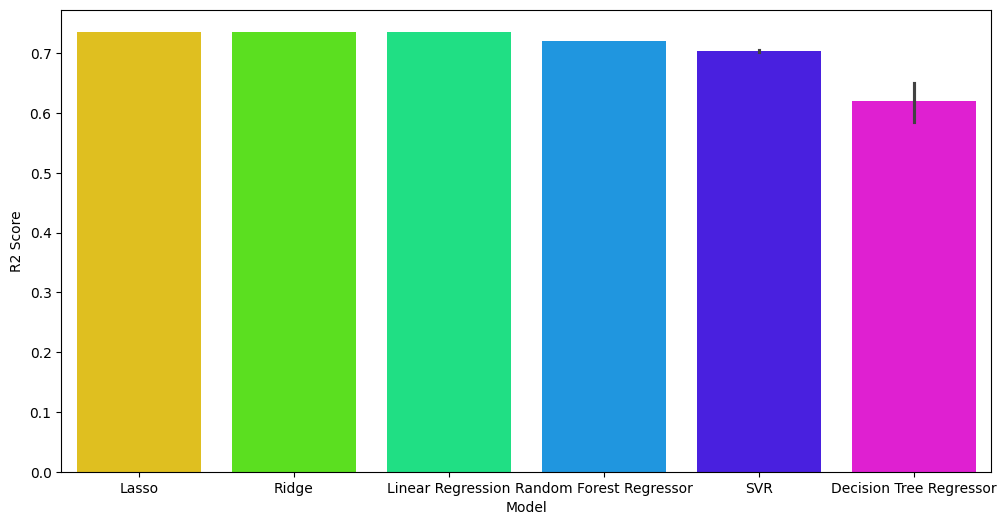

In [67]:
resulted_model_ordered = resulted_model.sort_values('R2 Score', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R2 Score', data=resulted_model_ordered, palette='hsv')